In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [213]:
# Load the data
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [215]:
data.shape

(32561, 15)

In [216]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [217]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [218]:
missing_values = data.applymap(lambda x: x == '?').sum().sum()
print(f'The dataset contains {missing_values} missing values represented as "?".')

The dataset contains 4262 missing values represented as "?".


C:\Users\Nicolaus\AppData\Local\Temp\ipykernel_2604\3163091106.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_values = data.applymap(lambda x: x == '?').sum().sum()


In [219]:
data[data == '?'] = np.nan

In [220]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [221]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [222]:
data.duplicated().sum()

24

In [223]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [224]:
data.duplicated().sum()

24

In [225]:
data.drop_duplicates(inplace=True)

In [226]:
X = data.drop('income', axis=1)
y = data['income']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [228]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1216,62,Private,109463,Some-college,10,Separated,Sales,Unmarried,White,Female,0,1617,33,United-States
27958,52,Private,312477,HS-grad,9,Widowed,Transport-moving,Not-in-family,White,Male,0,0,40,United-States
23074,69,Private,168794,7th-8th,4,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,48,United-States
19677,33,Private,199227,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States
19179,40,Private,374367,Assoc-voc,11,Separated,Sales,Not-in-family,Black,Male,0,0,44,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29823,31,Private,112627,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States
5390,51,Private,146767,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
860,55,Federal-gov,238192,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States
15800,23,Private,233626,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States


In [229]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
3643,53,Private,150980,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States
16041,18,Private,284450,11th,7,Never-married,Prof-specialty,Own-child,White,Male,0,0,25,United-States
9403,42,Private,156580,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States
17909,49,Self-emp-inc,94606,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States
5198,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12138,24,Local-gov,461678,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States
20526,18,Private,102182,12th,8,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,30,United-States
27628,34,Private,167832,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
26456,25,Private,262978,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States


In [230]:
# Preprocessing
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [231]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1216,62,3,109463,15,10,5,11,4,4,0,0,1617,33,38
27958,52,3,312477,11,9,6,13,1,4,1,0,0,40,38
23074,69,3,168794,5,4,2,9,0,4,1,0,0,48,38
19677,33,3,199227,9,13,2,3,0,4,1,0,0,55,38
19179,40,3,374367,8,11,5,11,1,2,1,0,0,44,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29823,31,3,112627,11,9,2,13,0,0,1,0,0,40,38
5390,51,3,146767,8,11,2,9,0,4,1,0,0,40,38
860,55,0,238192,11,9,2,12,0,4,1,0,1887,40,38
15800,23,3,233626,9,13,4,11,1,4,1,0,0,25,38


In [232]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
3643,53,3,150980,15,10,2,6,0,4,1,3137,0,40,38
16041,18,3,284450,1,7,4,9,3,4,1,0,0,25,38
9403,42,3,156580,15,10,2,6,5,4,0,0,0,37,38
17909,49,4,94606,10,16,2,9,0,2,1,0,0,60,38
5198,58,1,205267,9,13,2,9,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12138,24,1,461678,0,6,4,7,1,4,1,0,0,40,38
20526,18,3,102182,2,8,4,8,1,4,0,0,0,30,38
27628,34,3,167832,0,6,2,2,0,4,1,0,0,40,38
26456,25,3,262978,15,10,4,11,1,4,1,0,0,30,38


In [233]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [234]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.719100,-0.085012,-0.754592,1.215517,-0.034646,1.588320,1.226546,1.579154,0.396785,-1.421322,-0.146525,3.781030,-0.603438,0.259289
1,0.984731,-0.085012,1.167816,0.180266,-0.424687,2.253149,1.729134,-0.280828,0.396785,0.703570,-0.146525,-0.217300,-0.037637,0.259289
2,2.233158,-0.085012,-0.192767,-1.372611,-2.374893,-0.406166,0.723958,-0.900822,0.396785,0.703570,-0.146525,-0.217300,0.608992,0.259289
3,-0.410569,-0.085012,0.095414,-0.337360,1.135478,-0.406166,-0.783805,-0.900822,0.396785,0.703570,-0.146525,-0.217300,1.174793,0.259289
4,0.103489,-0.085012,1.753873,-0.596173,0.355396,1.588320,1.226546,-0.280828,-1.938600,0.703570,-0.146525,-0.217300,0.285677,0.259289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22770,-0.557443,-0.085012,-0.724631,0.180266,-0.424687,-0.406166,1.729134,-0.900822,-4.273985,0.703570,-0.146525,-0.217300,-0.037637,0.259289
22771,0.911294,-0.085012,-0.401348,-0.596173,0.355396,-0.406166,0.723958,-0.900822,0.396785,0.703570,-0.146525,-0.217300,-0.037637,0.259289
22772,1.205042,-2.785369,0.464386,0.180266,-0.424687,-0.406166,1.477840,-0.900822,0.396785,0.703570,-0.146525,4.448655,-0.037637,0.259289
22773,-1.144938,-0.085012,0.421149,-0.337360,1.135478,0.923492,1.226546,-0.280828,0.396785,0.703570,-0.146525,-0.217300,-1.250067,0.259289


In [235]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.058168,-0.085012,-0.361453,1.215517,-0.034646,-0.406166,-0.029924,-0.900822,0.396785,0.703570,0.277836,-0.2173,-0.037637,0.259289
1,-1.512122,-0.085012,0.902419,-2.407862,-1.204770,0.923492,0.723958,0.959160,0.396785,0.703570,-0.146525,-0.2173,-1.250067,0.259289
2,0.250362,-0.085012,-0.308425,1.215517,-0.034646,-0.406166,-0.029924,2.199148,0.396785,-1.421322,-0.146525,-0.2173,-0.280123,0.259289
3,0.764421,0.815107,-0.895278,-0.078547,2.305602,-0.406166,0.723958,-0.900822,-1.938600,0.703570,-0.146525,-0.2173,1.578936,0.259289
4,1.425352,-1.885250,0.152608,-0.337360,1.135478,-0.406166,0.723958,2.199148,0.396785,-1.421322,-0.146525,-0.2173,-0.037637,0.259289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,-1.071501,-1.885250,2.580651,-2.666675,-1.594811,0.923492,0.221370,-0.280828,0.396785,0.703570,-0.146525,-0.2173,-0.037637,0.259289
9758,-1.512122,-0.085012,-0.823538,-2.149050,-0.814728,0.923492,0.472664,-0.280828,0.396785,-1.421322,-0.146525,-0.2173,-0.845924,0.259289
9759,-0.337132,-0.085012,-0.201876,-2.666675,-1.594811,-0.406166,-1.035099,-0.900822,0.396785,0.703570,-0.146525,-0.2173,-0.037637,0.259289
9760,-0.998064,-0.085012,0.699093,1.215517,-0.034646,0.923492,1.226546,-0.280828,0.396785,0.703570,-0.146525,-0.2173,-0.845924,0.259289


In [236]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8597623437820119


In [237]:
# PCA
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.1476186 , 0.10142834, 0.08042233, 0.07958796, 0.07456397,
       0.0733667 , 0.07070457, 0.06752334, 0.06474505, 0.06094819,
       0.05979889, 0.04926225, 0.04280906, 0.02722075])

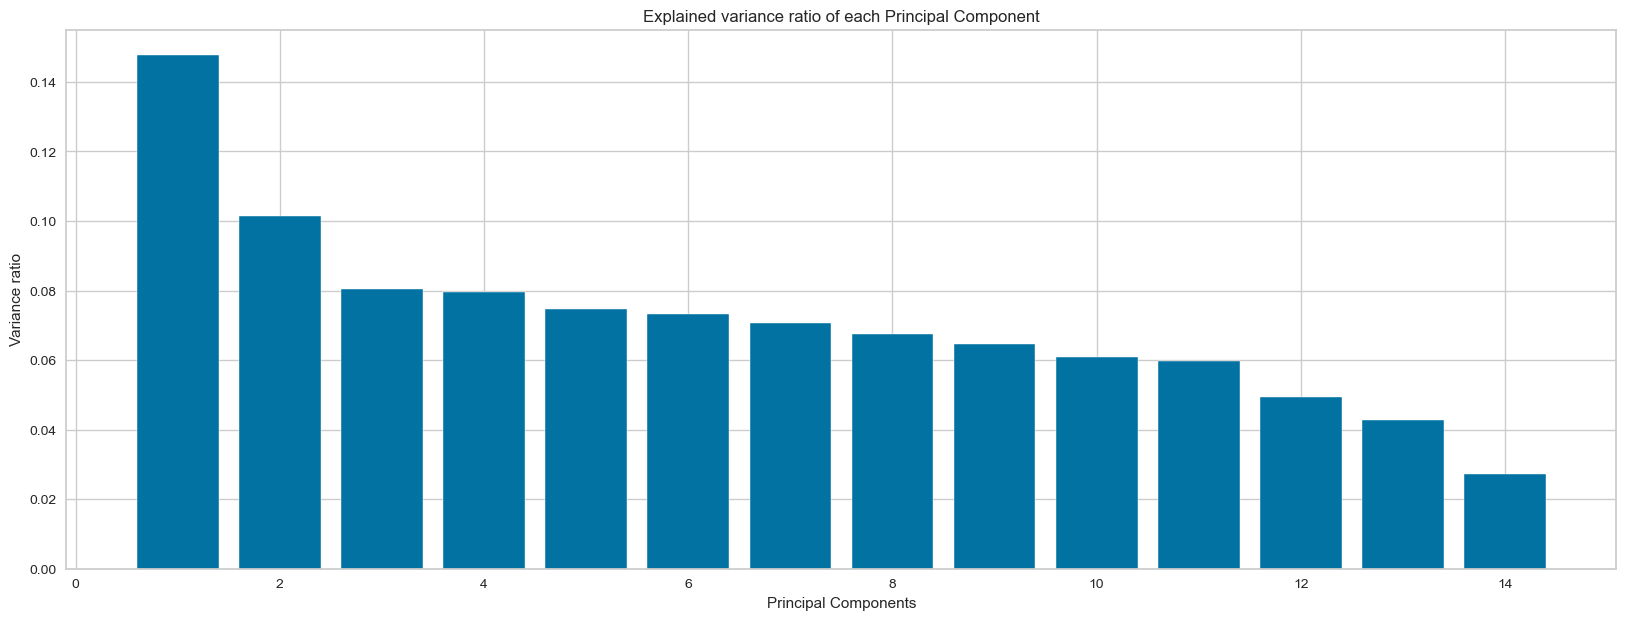

In [238]:
plt.figure(figsize=(20, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

In [239]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [240]:
feature_names = data.drop('income', axis=1).columns.tolist()
mdi_importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=True)

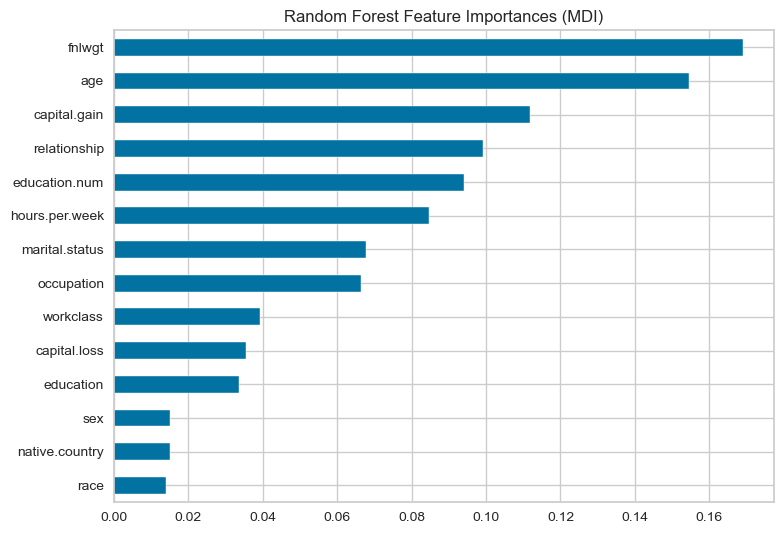

In [241]:
ax = mdi_importances.plot.barh()
ax.set_title('Random Forest Feature Importances (MDI)')
ax.figure.tight_layout()

with 13 features

In [242]:
X = data.drop(['race', 'income'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [243]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [244]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [245]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8557672608072117


with 12 features

In [246]:
X = data.drop(['income', 'race', 'sex'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'native.country']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [248]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [249]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8575087072321246


with 11 features

In [250]:
X = data.drop(['income', 'race', 'sex', 'native.country'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [251]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [252]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [253]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8563818889571809


with 10 features

In [266]:
X = data.drop(['income', 'race', 'sex', 'native.country', 'education'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [267]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [268]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7456
        >50K       0.74      0.63      0.68      2306

    accuracy                           0.86      9762
   macro avg       0.81      0.78      0.80      9762
weighted avg       0.85      0.86      0.86      9762


In [269]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.859659905757017


with 9 features

In [258]:
X = data.drop(['income', 'race', 'sex', 'native.country', 'education', 'capital.loss'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [259]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [260]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [261]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8491087891825445


with 8 features

In [262]:
X = data.drop(['income', 'race', 'sex', 'native.country', 'education', 'capital.loss', 'workclass'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [263]:
categorical = ['marital.status', 'occupation', 'relationship']

for col in categorical:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [264]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [265]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8450112681827494
